In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed

0.04720943871272492
1.1759270290351824


Price,Close,High,Low,Open,Volume,Close_Change,High_Change,Low_Change,Open_Change,Volume_Change,Big_Movement
1,24.485960,24.485960,24.330329,24.330329,480500,0.711201,0.639622,0.499963,-0.000037,-52.103270,0
2,24.537836,24.555128,24.416790,24.468667,201300,0.211860,0.282482,0.355362,0.568582,-58.106139,0
3,24.797237,24.814530,24.555144,24.572437,529400,1.057148,1.056404,0.566638,0.424094,162.990561,0
4,24.900972,24.952849,24.607003,24.883680,531500,0.418333,0.557414,0.211190,1.266636,0.396675,0
5,24.883690,24.935567,24.745351,24.883690,492100,-0.069405,-0.069260,0.562232,0.000040,-7.412982,0
...,...,...,...,...,...,...,...,...,...,...,...
8233,662.229980,665.830017,653.169983,657.169983,88779600,-0.122164,0.105244,-1.000354,-0.526760,11.587534,0
8234,665.169983,670.229980,658.929993,666.820007,81702600,0.443955,0.660824,0.881855,1.468421,-7.971426,0
8235,660.640015,668.710022,657.109985,666.820007,110563300,-0.681024,-0.226782,-0.276206,0.000000,35.324090,0
8236,664.390015,665.760010,658.140015,659.500000,96500900,0.567631,-0.441150,0.156751,-1.097749,-12.718868,0


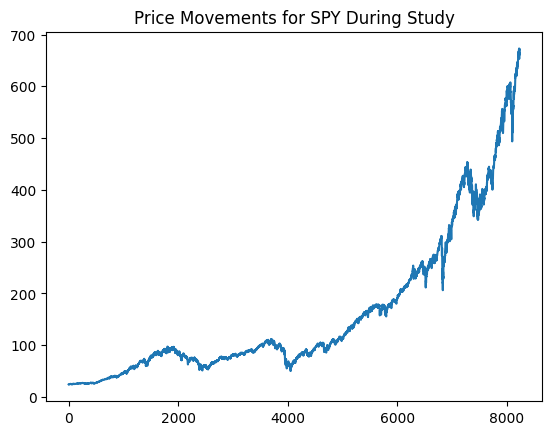

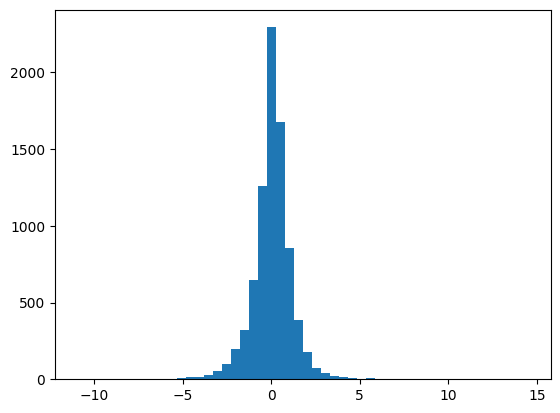

In [8]:
TICKER = 'SPY'
INTERVAL = '1d'
PERIOD = '730d' if INTERVAL == '1h' else 'max'

LOOKBACK = 10000

def get_data(ticker=TICKER, lookback=LOOKBACK, interval=INTERVAL):
    df = yf.download(ticker, interval=interval, auto_adjust=True, period=PERIOD)
    df.columns = df.columns.get_level_values(0)
    df = df.reset_index(drop=True)

    for c in df.columns:
        df[f'{c}_Change'] = df[c].pct_change() * 100

    # only return the subset of data you are interested in
    subset = df.iloc[-lookback:, :]
    plt.figure()
    plt.plot(subset['Close'])
    plt.title(f'Price Movements for {ticker} During Study')

    plt.figure()
    plt.hist(df['Close_Change'], bins=50)

    return subset.dropna()

def add_big_price_movement(df):

    close_change_avg = df['Close_Change'].mean()
    close_change_std = df['Close_Change'].std()
    print(close_change_avg)
    print(close_change_std)

    df['Big_Movement'] = np.where(df['Close_Change'] > close_change_avg + (close_change_std * 2), 1, 
                                  np.where(df['Close_Change'] < close_change_avg - (close_change_std * 2), -1, 0))

    return df

def main():
    df = get_data()
    df = add_big_price_movement(df)
    return df

df = main()
df

In [3]:
df['Big_Movement'].value_counts()

Big_Movement
 0    7840
-1     230
 1     168
Name: count, dtype: int64

In [6]:
df['Day_After'] = df['Big_Movement'].shift(1)
large_pos_shifts = df.loc[df['Day_After'] == 1]
large_pos_shifts['Close_Change'].mean()

np.float64(-0.2411041424522029)

In [7]:
df['Day_After'] = df['Big_Movement'].shift(1)
large_neg_shifts = df.loc[df['Day_After'] == -1]
large_neg_shifts['Close_Change'].mean()

np.float64(0.4053700152310099)